Linear Models Lab

Clean the data and perform some EDA and visualization to get to know the data set.

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import PolynomialFeatures

In [8]:
df = pd.read_csv('/Users/averyanderson/Desktop/data/cars_hw.csv',low_memory=False) #read in data

In [10]:
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


<Axes: >

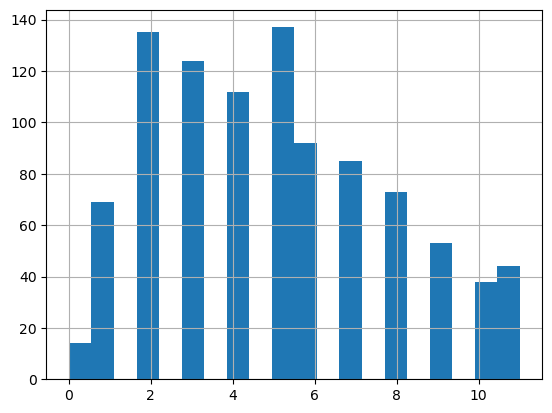

In [22]:
df['age'] = max(df['Make_Year'])-df['Make_Year'] # Convert year to age
df['age'].hist(bins=20)

In [61]:
df.dropna()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price,age
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000,5
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000,6
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000,3
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000,5
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,972,Hyundai,2018,white,sedan,23869,1st,5,petrol,6-Speed,Automatic,956000,4
972,973,Hyundai,2019,white,sedan,14831,1st,5,petrol,6-Speed,Automatic,1027000,3
973,974,Hyundai,2014,silver,sedan,52846,1st,5,petrol,4-Speed,Automatic,736000,8
974,975,Ford,2020,white,crossover,28335,2nd,5,diesel,5-Speed,Automatic,749000,2


<Axes: ylabel='Density'>

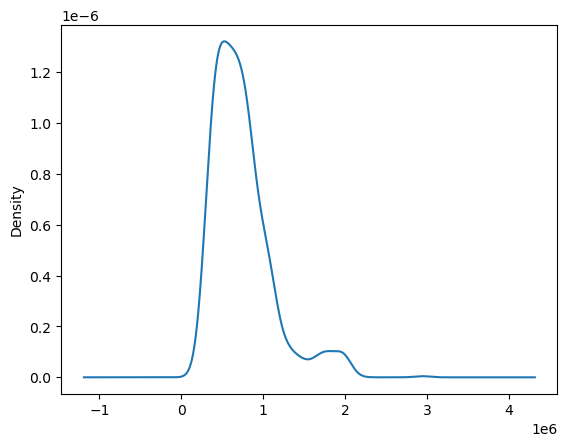

In [20]:
df['Price'].plot.density()

Axes(0.125,0.11;0.775x0.77) 



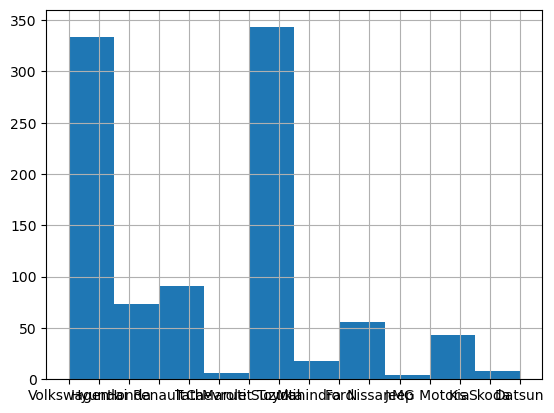

In [14]:
print(df['Make'].hist(), '\n') 

In [16]:
top_institutions = df.groupby("Make")["Price"].sum().nlargest(10)
print(top_institutions)

Make
Hyundai          211027000
Maruti Suzuki    172514000
MG Motors         65431000
Honda             58325000
Renault           45055000
Toyota            40017000
Ford              37501000
Tata              24270000
Mahindra          19803000
Volkswagen        17569000
Name: Price, dtype: int64


Transform your variables --- particularly categorical ones --- for use in your regression analysis.

In [32]:
df2 = pd.get_dummies(df, columns=[
    'Make', 'Color', 'Body_Type', 'No_of_Owners', 
    'Fuel_Type', 'Transmission', 'Transmission_Type'
], drop_first=True)

In [34]:
df2.head()

,Unnamed: 0,Make_Year,Mileage_Run,Seating_Capacity,Price,age,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,...,Body_Type_suv,No_of_Owners_2nd,No_of_Owners_3rd,Fuel_Type_petrol,Fuel_Type_petrol+cng,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Manual
0,1,2017,44611,5,657000,5,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2,2016,20305,5,682000,6,False,False,False,True,...,False,False,False,True,False,True,False,False,False,True
2,3,2019,29540,5,793000,3,False,False,True,False,...,True,True,False,True,False,True,False,False,False,True
3,4,2017,35680,5,414000,5,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
4,5,2017,25126,5,515000,5,False,False,False,True,...,False,False,False,True,False,True,False,False,False,True


mplement an ~80/~20 train-test split. Put the test data aside.

In [38]:
from sklearn.model_selection import train_test_split
X = df2.drop(columns=['Price'])
y = df2['Price']               
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and  on the both the training and test sets.

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train_mileage = X_train[['Mileage_Run']]
X_test_mileage = X_test[['Mileage_Run']]
model1 = LinearRegression()
model1.fit(X_train_mileage, y_train)
y_train_pred = model1.predict(X_train_mileage)
y_test_pred = model1.predict(X_test_mileage)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(train_rmse)
print(test_rmse)
print(train_r2)
print(test_r2)

369437.23206086224
330349.98245800147
0.022185952432653644
0.048514305445613526


In [48]:
X_train_mileage = X_train[['age']]
X_test_mileage = X_test[['age']]
model1 = LinearRegression()
model1.fit(X_train_mileage, y_train)
y_train_pred = model1.predict(X_train_mileage)
y_test_pred = model1.predict(X_test_mileage)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(train_rmse)
print(test_rmse)
print(train_r2)
print(test_r2)

317443.71038136375
288232.56357944803
0.27804786992730446
0.2756644914438021


In [52]:
X_train_mileage = X_train[['Seating_Capacity']]
X_test_mileage = X_test[['Seating_Capacity']]
model1 = LinearRegression()
model1.fit(X_train_mileage, y_train)
y_train_pred = model1.predict(X_train_mileage)
y_test_pred = model1.predict(X_test_mileage)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(train_rmse)
print(test_rmse)
print(train_r2)
print(test_r2)

372817.71373941115
338922.6681168419
0.0042093904998289355
-0.001509147301673286


For these examples, age was my best model

Make partial correlation plots for each of the numeric variables in your model. 

In [69]:
from sklearn.linear_model import LinearRegression # Import linear regression model
df2.loc[:, ['Mileage_Run','Price','age_ihs'] ] = df2.loc[:,['Mileage_Run','Price','age'] ].apply(winsorize)
y = df2['Price'] # Target variable
df2['Mileage_Run X age'] = df2['Mileage_Run']*df2['age'] # Interaction term
#X_d = pd.get_dummies(df['brand'],dtype='int',drop_first=True) # Create brand dummies
X_n = df2.loc[:,['Mileage_Run','age', 'Mileage_Run X age']]
#X = pd.concat([X_n,X_d],axis=1)
X = X_n
reg = LinearRegression(fit_intercept=True).fit(X, y) # Fit the linear model
print('Rsq: ', reg.score(X,y) )

Rsq:  0.31584814212748447


In [71]:
var =  'Mileage_Run' 
x_k = X[var]
X_mk = X.drop(var,axis=1)
reg_y = LinearRegression(fit_intercept=False).fit(X_mk, y)
r_y = y - reg_y.predict(X_mk)
reg_k = LinearRegression(fit_intercept=False).fit(X_mk, x_k) 
r_x = x_k - reg_k.predict(X_mk)

Partial R^2:  0.49496783786848797


[Text(0.5, 1.0, 'Scatterplot of Residuals')]

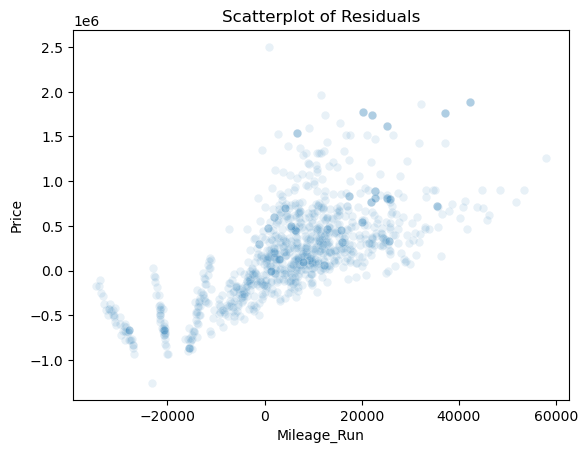

In [73]:
reg = LinearRegression().fit(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy())
print('Partial R^2: ', reg.score(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy()) )
sns.scatterplot(y=r_y, x=r_x,alpha=.1).set(title='Scatterplot of Residuals')

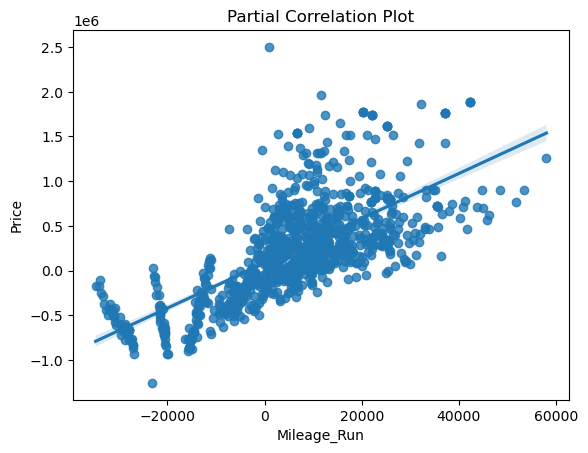

In [75]:
sns.regplot(y=r_y, x=r_x).set(title='Partial Correlation Plot')
plt.show()

Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. 

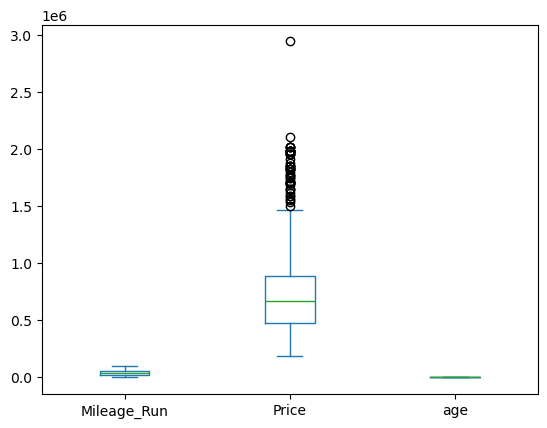

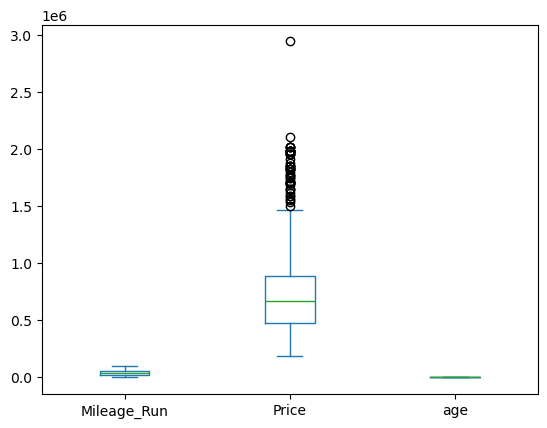

In [85]:
y = df2['Price']
df2.loc[:,['Mileage_Run','Price','age']].plot.box()
df2.loc[:, ['Mileage_Run','Price','age'] ] = df.loc[:,['Mileage_Run','Price','age'] ].apply(winsorize)
df2.loc[:,['Mileage_Run','Price','age']].plot.box()
expander = PolynomialFeatures(degree=1,include_bias=False) 
X_num = df2.loc[:,['Mileage_Run']]
Z = expander.fit_transform(X_num) 
names = expander.get_feature_names_out() 
X_num = pd.DataFrame(data=Z, columns = names) 

In [89]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression(fit_intercept=False).fit(X, y) 
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) 
print('R-squared: ', reg.score(X, y)) 

R-squared:  -0.17644524488673796


Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?

As seen above from the comparison of simple models to the more complex one I used like we learned in class, the more variables you use to run a regression does not necesarily mean you increase your accuracy. Though a simple regression using only one variable like age may underfit the model, it can still work to provide a helpful guideline. Adding a couple variables may help increase the r squared and the accuracy of the model, but the more you add, the more you run into problems with overfitting as the regression is working with too many variables that it becomes unrealiable. 